## 과제 1 - 의사 결정 나무

In [79]:
import graphviz

import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import export_graphviz
import graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE

import os

import warnings
warnings.filterwarnings("ignore")

In [38]:
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False )

### 1. 데이터 구성하기

In [39]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/바탕화면/실습화일/2. Big Data 분석/유방암.csv", encoding = "euc-kr")
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [40]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [41]:
# diagnosis 데이터를 0과 1로 변환
df_raw["diagnosis"] = df_raw["diagnosis"].map({"음성": 0, "양성": 1})
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [42]:
# 데이터 구성하기 - 데이터 분할 (7:3)
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"]

df_train_x , df_test_x , df_train_y , df_test_y = train_test_split(\
    df_raw_x , df_raw_y, test_size = 0.3 , random_state = 1234)

print("분할 전 설명변수 데이터 : " , df_raw_x.shape)
print("분할 후 설명변수 데이터 : Train" , df_train_x.shape , "Test" , df_test_x.shape)

분할 전 설명변수 데이터 :  (320, 30)
분할 후 설명변수 데이터 : Train (224, 30) Test (96, 30)


### 2. 모델 생성

In [43]:
# 기본 옵션으로 모델 생성
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.896


In [44]:
# 현재 생성된 모델의 옵션 확인
print(tree_uncustomized.get_params().keys())
print(tree_uncustomized.get_params().values())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 1234, 'best'])


###### max_depth 파라미터 조정

최대 깊이가 커질 수록 Train Accuracy가 1.000에 가까워지고, Test Accuracy는  0.896에 수렴하는 것을 볼 수 있다. 

최대 깊이가 3 이상일 때부터 Train Accuracy가 1.000으로 과적합 되었다고 판단하여, 최대 깊이는 2로 설정을 한다.

In [45]:
train_accuracy = [] ; test_accuracy = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth , random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy


In [46]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.938,0.823
1,2,0.978,0.865
2,3,1.000,0.896
3,4,1.000,0.896
4,5,1.000,0.896
5,6,1.000,0.896
6,7,1.000,0.896
7,8,1.000,0.896
8,9,1.000,0.896
9,10,1.000,0.896


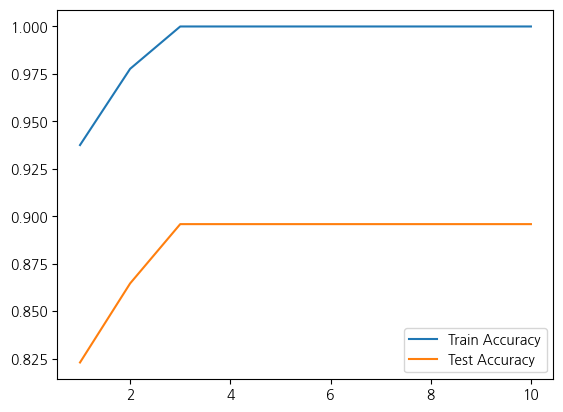

In [47]:
# 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle ="-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle ="-", label = "Test Accuracy")
plt.legend()

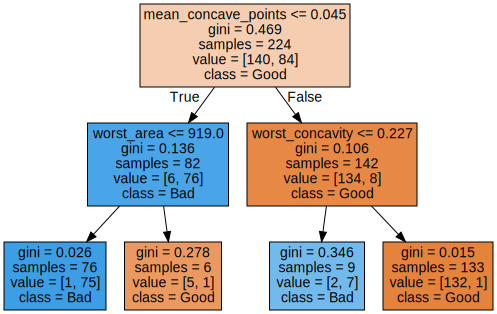

In [48]:
# 최대 깊이가 2인 모델 의사결정나무 확인
v_feature_name = df_train_x.columns
tree_low = DecisionTreeClassifier(max_depth = 2 , random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file = "tree_low.dot" , class_names = ['Good', 'Bad'], 
               feature_names = v_feature_name , impurity = True , filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

###### min_samples_split 파라미터 조정

최소자료수가 80 이상일 때부터 TrainAccuracy와 TestAccuracy가 감소하는 것으로 보아 80부터는 모델 성능이 떨어진다고 판단할 수 있다.

반면, 최소자료수가 10부터 80까지 Train Accuracy와 Test Accuracy가 동일한 값을 갖는 것을 확인할 수 있다.

최소자료수가 커지면  모델이 단순해져서 과소적합이 일어나고, 최소자료수가 너무 작으면 모델이 복잡해져 과적합이 된다.  

따라서, 동일한 Accuracy인 10~80 중 중간인 40을 최소자료수로 선택한다.

In [49]:
train_accuracy = []; test_accuracy = []
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split , max_depth = 2 , random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [50]:
# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.978,0.865
1,20,0.978,0.865
2,30,0.978,0.865
3,40,0.978,0.865
4,50,0.978,0.865
5,60,0.978,0.865
6,70,0.978,0.865
7,80,0.978,0.865
8,90,0.960,0.812
9,100,0.960,0.812


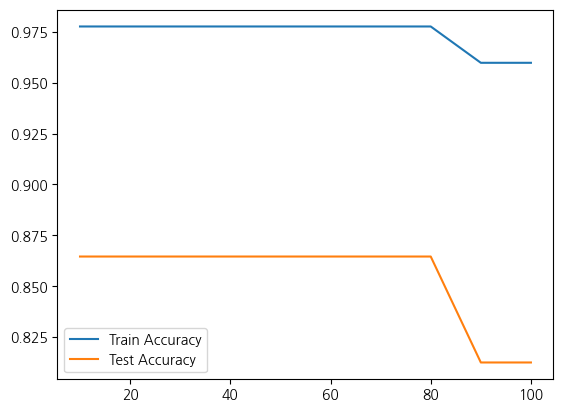

In [52]:
# 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "-", label = "Test Accuracy")
plt.legend()

In [57]:
# 분리 노드의 최소 자료수가 40인 모델
tree_low = DecisionTreeClassifier(max_depth = 2 , min_samples_split = 40, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=2, min_samples_split=40, random_state=1234)

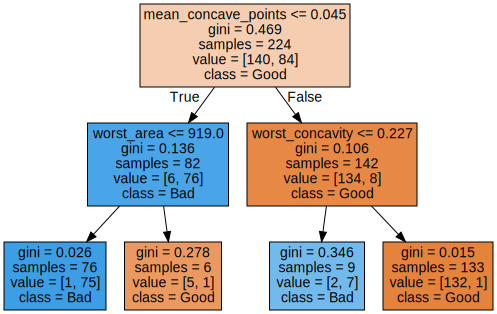

In [58]:
# 분리 노드의 최소 자료수가 40인 모델
export_graphviz(tree_low, out_file = "tree_low.dot" , class_names = ["Good", "Bad"], 
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

###### min_samples_leaf 파라미터 조정

최소자료수가 2,4,6 일때는 Train Accuracy는 높지만, Test Accuracy가 낮기 때문에 과적합 상태로 판단된다. 

따라서 Train Accuracy와 Test Accuracy 둘 다 낮지 않고, 둘 간의 차이가 적은 최소자료수인 8로 선택을 하였다.  

In [59]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf , min_samples_split = 40, max_depth = 2 , random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [60]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.978,0.865
1,4,0.978,0.865
2,6,0.978,0.865
3,8,0.969,0.875
4,10,0.955,0.875
5,12,0.946,0.802
6,14,0.938,0.823
7,16,0.938,0.823
8,18,0.938,0.823
9,20,0.938,0.823


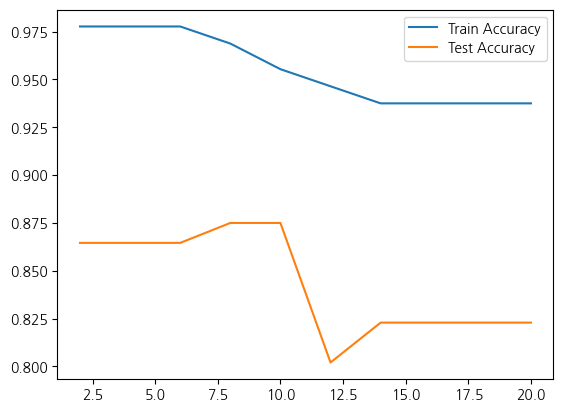

In [62]:
# 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "-", label = "Test Accuracy")
plt.legend()

In [63]:
# 잎사귀 노드의 최소 자료수가 8인 모델
tree_low = DecisionTreeClassifier(max_depth = 2 , min_samples_split = 40, min_samples_leaf = 8,random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=8, min_samples_split=40,
                       random_state=1234)

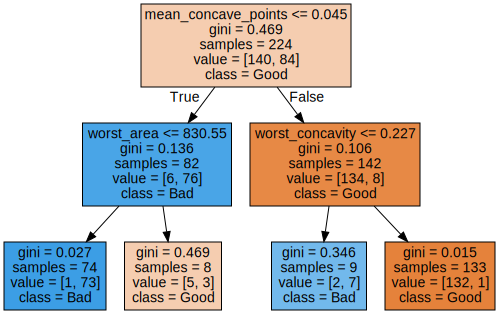

In [64]:
# 잎사귀 노드의 최소 자료수가 8인 모델
export_graphviz(tree_low, out_file = "tree_low.dot" , class_names = ["Good", "Bad"], 
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 3. 최종 모델 선정

- 최종 모델

위에서 진행한 파라미터 선정 과정을 통해 최종 모델은 max_depth가 2, min_samples_split이 40, min_samples_leaf가 8인 결정 트리로 구성하였다.


- f1 스코어 해석

클래스 0에 대한 f1-score는 0.917로 유방암이 음성인지 모델이 잘 예측하고 있는 것는 것으로 보인다. 하지만 클래스 1에 대한 f1-score는 0.750으로 클래스 0에 비해 정확도와 재현율이 낮은 것을 확인할 수 있고, 유방암이 양성인지에 대한 예측력은 떨어진다고 볼 수 있다. 

모델의 예측 정확도는 0.875로 성능이 나쁘지 않은 모델이라고 볼 수 있으나, 유방암이 양성인지에 대한 예측력이 떨어지므로, 모델의 성능을 더 향상시키기 위해 추가적인 조정이 필요하다고 생각된다.


- 설명변수 중요도

(세포)평균 오목한 점의 수(mean_concave_points)가 가장 높은 중요도인 0.836인 것을 확인할 수 있다. 모델에서 가장 큰 영향력을 가지며, 유방암의 양성/음성 판단에 있어서 중요한 역할을 한다고 볼 수 있다. 

(세포)평균 오목함 중 제일 큰 3개의 평균(worst_concavity)의 중요도는 0.106 이고, (세포)평균 면적 중 제일 큰 3개의 평균(worst_area)의 중요도는 0.057로 상대적으로 중요도가 낮은 것을 확인할 수 있다.

나머지의 변수들은 0에 가까운 수치로 유방암 예측에 있어서 큰 영향을 미치지 않는다.


In [65]:
# 최종 모델 
tree_final = DecisionTreeClassifier(max_depth = 2 , min_samples_split = 40, min_samples_leaf = 8,random_state = 1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=8, min_samples_split=40,
                       random_state=1234)

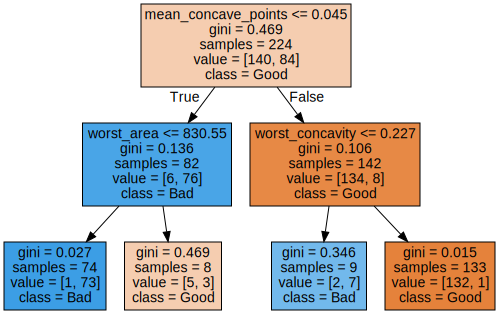

In [67]:
# tree_final.dot으로 결과 저장
export_graphviz(tree_final, out_file = "tree_final.dot" , class_names = ["Good", "Bad"], 
               feature_names = v_feature_name, impurity = True, filled = True)
# tree_final.dot 그리기
with open("tree_final.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [68]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix:\n {}\n".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.875

Confusion matrix:
 [[66  6]
 [ 6 18]]



In [69]:
# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.917     0.917     0.917        72
           1      0.750     0.750     0.750        24

    accuracy                          0.875        96
   macro avg      0.833     0.833     0.833        96
weighted avg      0.875     0.875     0.875        96



In [70]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending = False , inplace = True)
df_importance.round(3)

,Feature,Importance
7,mean_concave_points,0.836
26,worst_concavity,0.106
23,worst_area,0.057
0,mean_radius,0.000
16,concavity_error,0.000
28,worst_symmetry,0.000
27,worst_concave_points,0.000
25,worst_compactness,0.000
24,worst_smoothness,0.000
22,worst_perimeter,0.000


Text(0, 0.5, '설명변수')

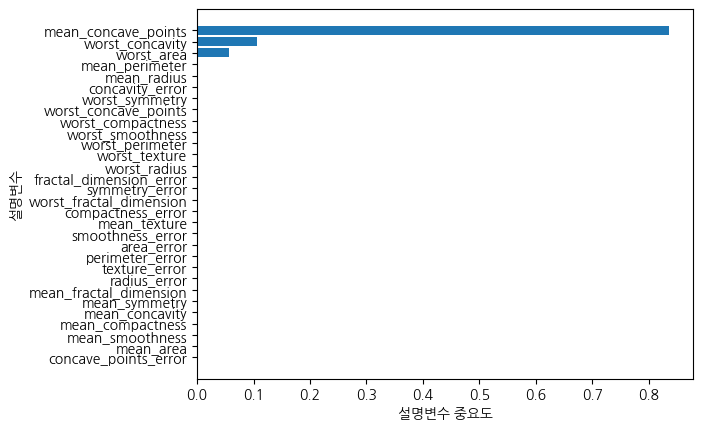

In [71]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True , inplace = True)
coordinates = range(len(df_importance))
plt.barh( y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

### 4. 결론

유방암 예측 모델에서 "평균 오목한 점의 수", "평균 오목함 중 제일 큰 3개의 평균", "평균 면적 중 제일 큰 3개의 평균" 이 중요한 변수로 나타났다.

"평균 오목한 점의 수" 변수가 가장 큰 중요도인 0.8를 갖습니다. 세포의 오목한 점의 수가 높을수록 유방암의 가능성이 높아진다는 것을 의미한다. 그리고 중요도는 낮지만 평균적으로 큰 오목한 점이 있을수록 또, 평균적으로 큰 면적을 가진 세포가 있을수록 유방암의 가능성이 높아진다.

해당 모델은 유방암이 음성인 경우에는 정확하게 예측을 하지만 양성인 경우에는 잘못된 예측을 하
는 경향이 존재한다. 모델의 민감도와 관련이 있으며, 파라미터 조정을 통해 모델을 개선해보거나 새로운 변수를 도입하여 모델의 성능을 향상시킬 수도 있을 것이다. 

모델이 아직은 성능이 만족스럽지 않아 실제로 사용하기에는 어려움이 있지만, 성능이 개선이 된다면 이 모델을 통해서 유방암 조기 진단이나 위험 요소 식별에 도움을 줄 수 있다고 생각한다.

--------------------------------------

## 과제 2 - 랜덤 포레스트

### 1. 데이터 구성하기

- 과제 1 의사결정트리에서 불러왔으므로 생략

### 2. 모델 생성 - Parameter 조정 / 평가

In [73]:
# 기본 옵션으로 모델생성
rf_uncutomized = RandomForestClassifier(random_state = 1234)
rf_uncutomized.fit(df_train_x, df_train_y)

print("Accuracy on training set:{:.3f}".format(rf_uncutomized.score(df_train_x, df_train_y)))
print("Accuracy on test set:{:.3f}".format(rf_uncutomized.score(df_test_x, df_test_y)))


Accuracy on training set:1.000
Accuracy on test set:0.927


In [74]:
# 랜덤 포레스트의 모델 옵션확인
print(rf_uncutomized.get_params().keys())
print(rf_uncutomized.get_params().values())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
dict_values([True, 0.0, None, 'gini', None, 'sqrt', None, None, 0.0, 1, 2, 0.0, 100, None, False, 1234, 0, False])


###### n_estimators 파라미터 조절

랜덤 포레스트 기법에서 생성하는 트리가 많아질 수록 모델의 성능은 좋아지지만 과적합될 우려가 존재한다. 반대로 트리가 적어지면 과소적합될 우려가 있기 때문에 적절한 개수를 선정하는 것이 중요하다. 

트리 개수가 90과 130일 때 Test Accuracy가 가장 높은 값인 0.938을 갖게 된다. 트리개수가 많아질수록 과적합될 우려 때문에 트리 개수는 90으로 설정한다. 

In [75]:
# n_estimators : 트리 수 변경에 따른 모델 성능
train_accuracy = []; test_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [76]:
# 모델 정확도 확인
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.991,0.865
1,20,1.000,0.917
2,30,1.000,0.927
3,40,1.000,0.927
4,50,1.000,0.927
5,60,1.000,0.927
6,70,1.000,0.927
7,80,1.000,0.927
8,90,1.000,0.938
9,100,1.000,0.927


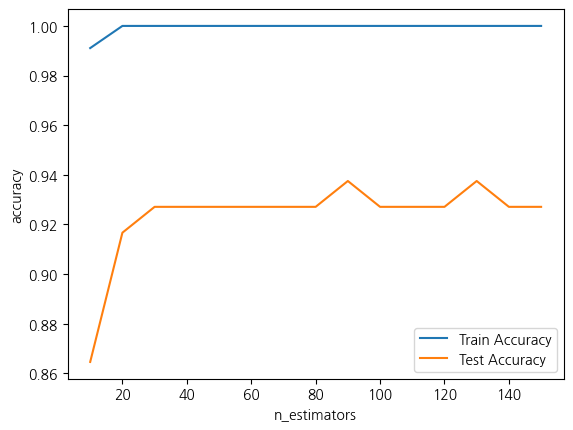

In [77]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-" , label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "-" , label = "Test Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()

###### OOB(Out-Of-Bag) 

트리를 구성하는데 사용되지 않은 샘플들을 이용하여 모델의 성능을 평가하는 데 사용한다.

In [80]:
# error 저장 리스트
oob_error = []

for v_n_estimator in range(1,151):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True , random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

Text(0.5, 0, 'n_estimators')

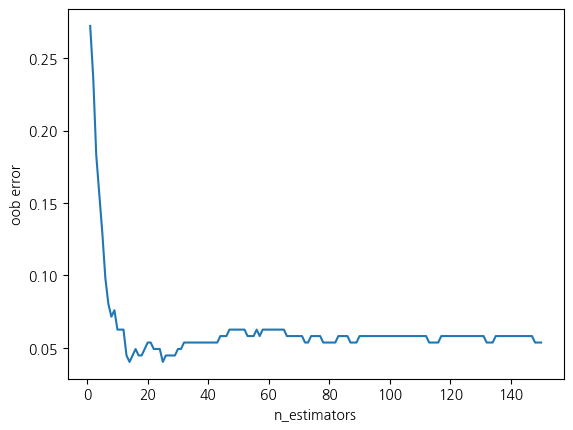

In [81]:
# 그래프로 표현
plt.plot(range(1,151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

###### max_depth 파라미터 조정

최대 깊이가 5 이상일 때부터 TestAccuracy가 0.938로 가장 높은 값인 것을 확인할 수 있다. 

5 이상 부터 모두 동일한 Test Accuracy 값을 가지지만, 최대 깊이를 너무 크게 잡으면 과적합될 우려가 있기 때문에 최대 깊이를 5로 선정한다.

In [82]:
#  max_depth: 최대 깊이 변경에 따른 모델 성능
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators = 90 , random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy


In [85]:
#  모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.955,0.927
1,2,0.978,0.917
2,3,0.991,0.917
3,4,1.000,0.927
4,5,1.000,0.938
5,6,1.000,0.938
6,7,1.000,0.938
7,8,1.000,0.938
8,9,1.000,0.938
9,10,1.000,0.938


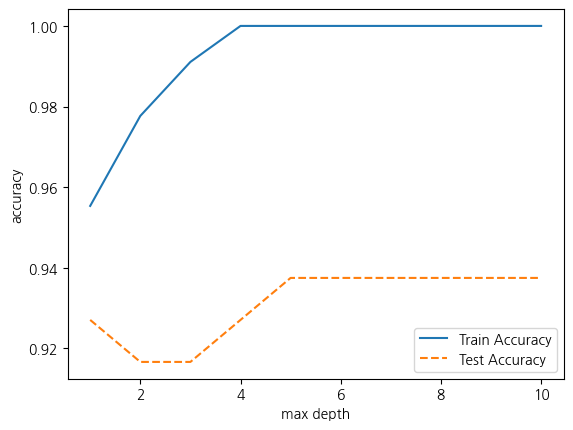

In [83]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()

###### min_samples_split 파라미터 조정

Min Samples Split 값이 50, 100일때 TestAccuracy가 0.927로 가장 높은 값을 확인할 수 있었다. 하지만 최소자료수가 너무 커지면 모델이 단순해져서, 과소적합 문제가 발생할 수 있다. 그래서 최소자료수는 50으로 선정하였다.

In [98]:
# min_samples_split :  노드의 최소 자료 수 변경에 따른 모델 성능
train_accuracy = []; test_accuracy = []
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split :
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth = 5 ,
                                n_estimators = 90 , random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [99]:
# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.987,0.917
1,20,0.978,0.917
2,30,0.978,0.917
3,40,0.978,0.917
4,50,0.982,0.927
5,60,0.964,0.906
6,70,0.964,0.885
7,80,0.955,0.896
8,90,0.951,0.906
9,100,0.955,0.927


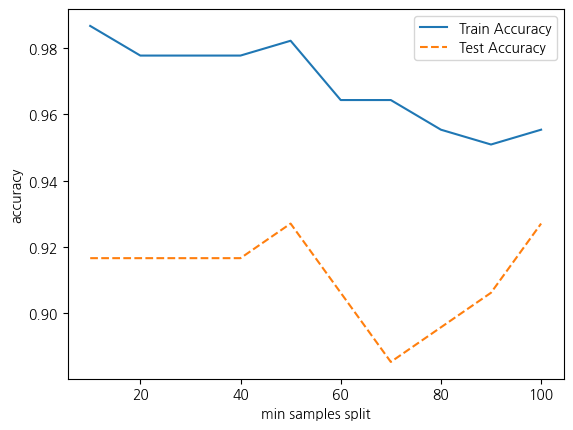

In [100]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

###### min_samples_leaf 파라미터 조정

Min Samples Leaf 값이 25, 30, 40, 45 일때 TestAccuracy가 0.927로 가장 높은 값을 확인할 수 있었다. 앞서, Split 노드의 최소자료수를 50으로 설정하였기 때문에 최대 절반으로 최소자료수를 선정해야 잘 분류될 것으로 판단하여 Leaf 노드의 최소자료수는 25로 선정하였다.

In [104]:
# min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 5 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf :
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf, max_depth = 5 ,
                               n_estimators = 90 , min_samples_split = 50, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy


In [105]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.978,0.917
1,10,0.964,0.917
2,15,0.960,0.917
3,20,0.955,0.917
4,25,0.951,0.927
5,30,0.951,0.927
6,35,0.955,0.917
7,40,0.951,0.927
8,45,0.955,0.927
9,50,0.969,0.917


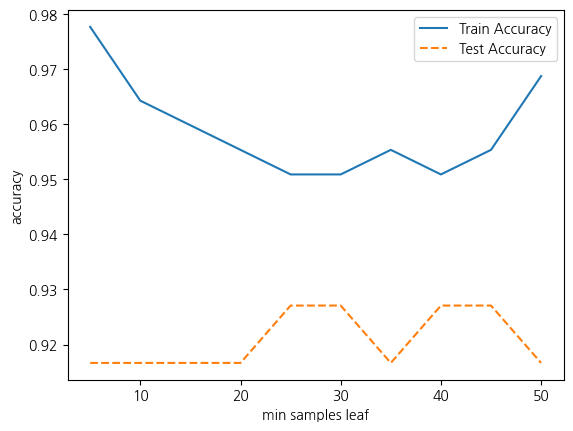

In [106]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples leaf"); plt.ylabel("accuracy")
plt.legend()

### 3. 최종 모델 선정


- 최종 모델

위에서 진행한 파라미터 선정 과정을 통해 최종 모델은 n_estimators는 90, max_depth가 5, min_samples_split이 50, min_samples_leaf가 25로 구성되었다.

- 모델 정확도

앞서 의사결정트리로 만들었던 모델의 정확도는 0.875이었지만, 랜덤 포레스트 기법을 통해서 Test set의 정확도는 0.927으로 향상된 수치를 확인할 수 있었다.

모델의 예측 정확도가 높기 때문에, 유방암의 양성/음성 판단에 있어서 해당 모델을 통해 예측해볼 수 있을 것이다. 

- 설명변수 중요도

0.1 이상의 수치를 가지는 변수들을 주요 변수라고 판단하였다. 최대 편차의 둘레 (worst_perimeter)가 0.161로 가장 중요도가 높다고 볼 수 있다. 다음 주요 변수로는 평균 오목한 점의 수(mean_concave_points), 평균 오목함(mean_concavity), 최대 오목한 점의 수(worst_concave_points)가 있다. 

앞서 했던 의사 결정 트리와 비교했을 때, 평균 오목한 점의 수(mean_concave_points) 변수가 두 모델에서 모두 중요한 역할을 한 것으로 나타났다. 랜덤포레스트 모델에서는 다른 변수들도 중요도가 높게 나타났는데 이는 랜덤포레스트 모델이 여러 개의 의사결정트리를 결합하여 예측을 했기 때문에 다양한 변수들의 조합들이 고려되어 최종값이 나온 것으로 보인다.

랜덤포레스트 모델을 활용하여 유방암 예측을 수행할 때, 평균 오목한 점의 수(mean_concave_points)를 주요한 변수로 고려하면서도 다른 변수들도 함께 고려하는 것이 좋을 것으로 생각된다.

In [107]:
# 최종 모델
rf_final = RandomForestClassifier(min_samples_leaf = 25,  min_samples_split = 50, max_depth = 5 , n_estimators = 90, random_state=1234)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)

In [108]:
print("Accuracy on training set : {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits = 3))

Accuracy on training set : 0.951
Accuracy on test set : 0.927

Confusion matrix: 
[[69  3]
 [ 4 20]]
              precision    recall  f1-score   support

           0      0.945     0.958     0.952        72
           1      0.870     0.833     0.851        24

    accuracy                          0.927        96
   macro avg      0.907     0.896     0.901        96
weighted avg      0.926     0.927     0.927        96



In [109]:
# 설명변수의 중요도
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
22,worst_perimeter,0.161
7,mean_concave_points,0.137
6,mean_concavity,0.125
27,worst_concave_points,0.121
20,worst_radius,0.098
23,worst_area,0.086
2,mean_perimeter,0.059
26,worst_concavity,0.048
3,mean_area,0.042
13,area_error,0.032


Text(0, 0.5, '설명변수')

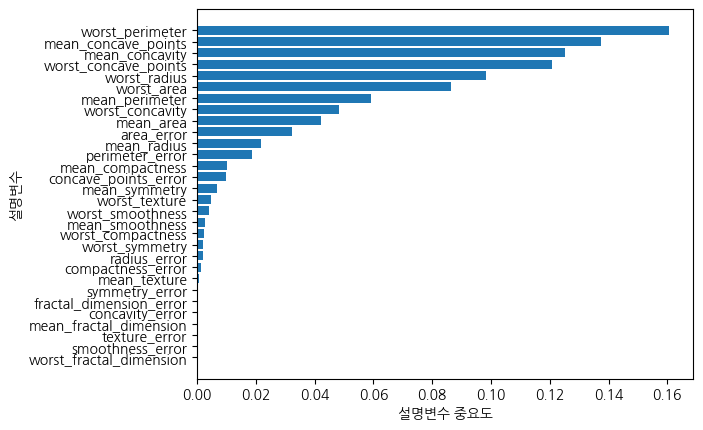

In [110]:
# 설명변수 중요도 그래프
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

### 4. 결론


평균 오목한 점의 수(mean_concave_points)가 유방암 진단에서 주요한 변수로 확인되었는데, 이는 음성과 양성을 구분하는데 유용한 정보를 제공하는 것으로 나타났다. 해당 변수를 중심으로 한 모델을 구축하고, 랜덤 포레스트 기법을 사용하여 의사결정트리보다 더 좋은 성능을 얻을 수 있을 것이다.

또, 테스트 세트의 정확도가 0.927로 나타났는데 이것은 해당 모델이 양성과 음성을 판단하는 데에 상당히 높은 예측력을 가지고 있다는 것을 의미한다. 따라서 이 모델을 사용하여 새로운 환자의 유방암 여부를 예측하는 데에도 활용해볼 수 있다.